In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import imageio
import os
import math
import folium
import seaborn

In [13]:
pd.options.display.float_format = '{:.6f}'.format
mta = pd.read_csv('./cleaned/cleaned_turnstile_200411.csv', parse_dates=['DATE'])
mta.set_index(['DATE'], inplace=True)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    daily_mta = mta.loc[mta.index.unique()[0], :]
    display(daily_mta)

In [ ]:
map = folium.Map(location=[40.74, -73.93], zoom_start=10.2)
for index, row in mta.loc[mta.index.unique()[0], :].iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']], radius=math.log1p(row['ENTRIES_DIFF']),
                        tooltip=row['STATION']+'\n'+str(row['ENTRIES_DIFF']), fill=True).add_to(map)
map

In [ ]:
map.save('map.html')

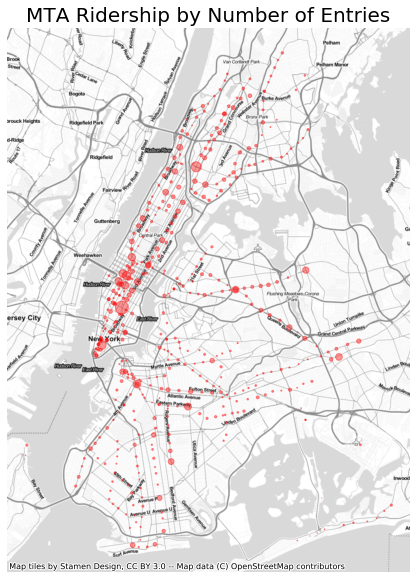

In [12]:
daily_mta = mta.loc[mta.index.unique()[0], :]
geo_mta = gpd.GeoDataFrame(daily_mta, geometry=gpd.points_from_xy(daily_mta['LONGITUDE'], daily_mta['LATITUDE']))
geo_mta.crs = 'epsg:4326'
geo_mta = geo_mta.to_crs(epsg=3857)
ax = geo_mta.plot(figsize=(10, 10), color='red', alpha=0.4, markersize=geo_mta['ENTRIES_DIFF']/120)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
ax.set_title('MTA Ridership by Number of Entries', fontdict={'fontsize': '20'})
ax.set_axis_off()
plt.savefig('./test.png', dpi=100, bbox_inches='tight')

In [14]:
# Batch process

pd.options.display.float_format = '{:.6f}'.format

directory = os.fsencode('./cleaned')
images = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    print('Processing '+filename)
    
    mta = pd.read_csv('./cleaned/'+filename, parse_dates=['DATE'])
    mta.set_index(['DATE'], inplace=True)

    for date in mta.index.unique():
        print('\tProcessing '+date.strftime('%m/%d/%Y'))
        daily_mta = mta.loc[date, :]
        geo_mta = gpd.GeoDataFrame(daily_mta, geometry=gpd.points_from_xy(daily_mta['LONGITUDE'], daily_mta['LATITUDE']))
        geo_mta.crs = 'epsg:4326'
        geo_mta = geo_mta.to_crs(epsg=3857)
        ax = geo_mta.plot(figsize=(10, 10), color='red', alpha=0.4, markersize=geo_mta['ENTRIES_DIFF']/120)
        ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite, zoom='auto')
        ax.set_title('MTA Ridership by Number of Entries\n'+date.strftime('%m/%d/%Y'), fontdict={'fontsize': '20'})
        ax.set_axis_off()
        plt.savefig('./maps/'+date.strftime('%y%m%d')+'.jpg', dpi=100, bbox_inches='tight')
        plt.close()
print('Done')

Processing cleaned_turnstile_200208.csv
	Processing 02/01/2020
	Processing 02/02/2020
	Processing 02/03/2020
	Processing 02/04/2020
	Processing 02/05/2020
	Processing 02/06/2020
	Processing 02/07/2020
Processing cleaned_turnstile_200215.csv
	Processing 02/08/2020
	Processing 02/09/2020
	Processing 02/10/2020
	Processing 02/11/2020
	Processing 02/12/2020
	Processing 02/13/2020
	Processing 02/14/2020
Processing cleaned_turnstile_200222.csv
	Processing 02/15/2020
	Processing 02/16/2020
	Processing 02/17/2020
	Processing 02/18/2020
	Processing 02/19/2020
	Processing 02/20/2020
	Processing 02/21/2020
Processing cleaned_turnstile_200229.csv
	Processing 02/22/2020
	Processing 02/23/2020
	Processing 02/24/2020
	Processing 02/25/2020
	Processing 02/26/2020
	Processing 02/27/2020
	Processing 02/28/2020
Processing cleaned_turnstile_200307.csv
	Processing 02/29/2020
	Processing 03/01/2020
	Processing 03/02/2020
	Processing 03/03/2020
	Processing 03/04/2020
	Processing 03/05/2020
	Processing 03/06/